In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

# data normalization
mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [5]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [7]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
235/235 - 3s - loss: 0.4839 - sparse_categorical_accuracy: 0.8260 - val_loss: 0.3956 - val_sparse_categorical_accuracy: 0.8570 - 3s/epoch - 14ms/step
Epoch 2/150
235/235 - 2s - loss: 0.3419 - sparse_categorical_accuracy: 0.8756 - val_loss: 0.3587 - val_sparse_categorical_accuracy: 0.8735 - 2s/epoch - 9ms/step
Epoch 3/150
235/235 - 2s - loss: 0.3050 - sparse_categorical_accuracy: 0.8878 - val_loss: 0.3450 - val_sparse_categorical_accuracy: 0.8763 - 2s/epoch - 9ms/step
Epoch 4/150
235/235 - 2s - loss: 0.2811 - sparse_categorical_accuracy: 0.8954 - val_loss: 0.3362 - val_sparse_categorical_accuracy: 0.8792 - 2s/epoch - 9ms/step
Epoch 5/150
235/235 - 2s - loss: 0.2573 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.3307 - val_sparse_categorical_accuracy: 0.8822 - 2s/epoch - 9ms/step
Epoch 6/150
235/235 - 2s - loss: 0.2401 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.3235 - val_sparse_categorical_accuracy: 0.8852 - 2s/epoch - 9ms/step
Epoch 7/150
235/235 - 2s - loss: 

Epoch 52/150
235/235 - 2s - loss: 0.0253 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.7057 - val_sparse_categorical_accuracy: 0.8952 - 2s/epoch - 9ms/step
Epoch 53/150
235/235 - 2s - loss: 0.0248 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.7235 - val_sparse_categorical_accuracy: 0.8934 - 2s/epoch - 9ms/step
Epoch 54/150
235/235 - 2s - loss: 0.0474 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6986 - val_sparse_categorical_accuracy: 0.8910 - 2s/epoch - 9ms/step
Epoch 55/150
235/235 - 2s - loss: 0.0356 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.7202 - val_sparse_categorical_accuracy: 0.8945 - 2s/epoch - 9ms/step
Epoch 56/150
235/235 - 2s - loss: 0.0384 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.7588 - val_sparse_categorical_accuracy: 0.8913 - 2s/epoch - 9ms/step
Epoch 57/150
235/235 - 2s - loss: 0.0319 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.7256 - val_sparse_categorical_accuracy: 0.8937 - 2s/epoch - 9ms/step
Epoch 58/150
235/235 - 2s - 

Epoch 103/150
235/235 - 2s - loss: 0.0227 - sparse_categorical_accuracy: 0.9928 - val_loss: 1.0177 - val_sparse_categorical_accuracy: 0.8926 - 2s/epoch - 9ms/step
Epoch 104/150
235/235 - 2s - loss: 0.0299 - sparse_categorical_accuracy: 0.9897 - val_loss: 1.0331 - val_sparse_categorical_accuracy: 0.8884 - 2s/epoch - 9ms/step
Epoch 105/150
235/235 - 2s - loss: 0.0173 - sparse_categorical_accuracy: 0.9940 - val_loss: 0.9555 - val_sparse_categorical_accuracy: 0.8954 - 2s/epoch - 9ms/step
Epoch 106/150
235/235 - 2s - loss: 0.0107 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.9752 - val_sparse_categorical_accuracy: 0.8970 - 2s/epoch - 9ms/step
Epoch 107/150
235/235 - 2s - loss: 0.0044 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.9908 - val_sparse_categorical_accuracy: 0.8985 - 2s/epoch - 9ms/step
Epoch 108/150
235/235 - 2s - loss: 0.0048 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.0342 - val_sparse_categorical_accuracy: 0.8959 - 2s/epoch - 9ms/step
Epoch 109/150
235/235 

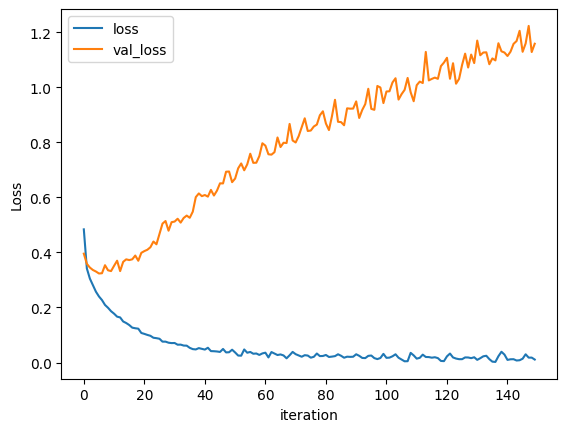

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

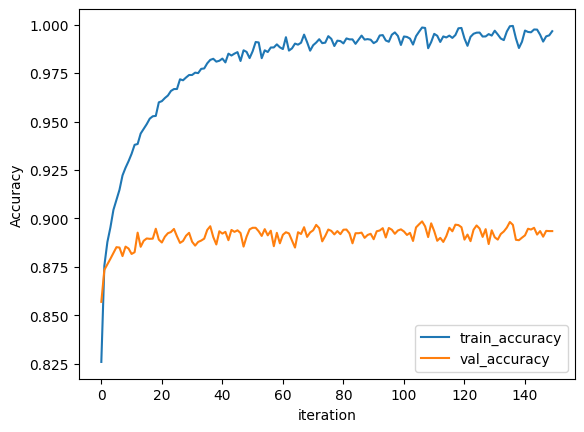

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()